In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_columns', None)

In [2]:
#Import train1 dataset
train1 = pd.read_csv('train_1.csv')
train1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17952\3672182846.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(train_1.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,7/17/2015,4852,519,1,1,0,0,303445
1,2,5,7/17/2015,4518,495,1,1,0,1,959585
2,3,5,7/17/2015,6679,673,1,1,0,1,739744
3,4,5,7/17/2015,10514,1343,1,1,0,1,864001
4,5,5,7/17/2015,4355,513,1,1,0,1,981931


In [3]:
#Import train2 dataset
train2 = pd.read_csv('train_2.csv')
train2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17952\2956278968.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train2 = pd.read_csv('train_2.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,2,4/29/2014,5923,628,1,1,0,0,381547
1,2,2,4/29/2014,6667,707,1,1,0,1,867805
2,3,2,4/29/2014,8455,874,1,1,0,0,702253
3,4,2,4/29/2014,9680,1257,1,1,0,0,667807
4,5,2,4/29/2014,6274,640,1,1,0,0,804835


In [4]:
#Concat train1 and train2 into a DataFrame
train = pd.concat([train1, train2], axis=0)
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,7/17/2015,4852,519,1,1,0,0,303445
1,2,5,7/17/2015,4518,495,1,1,0,1,959585
2,3,5,7/17/2015,6679,673,1,1,0,1,739744
3,4,5,7/17/2015,10514,1343,1,1,0,1,864001
4,5,5,7/17/2015,4355,513,1,1,0,1,981931
...,...,...,...,...,...,...,...,...,...,...
539654,1111,2,1/1/2013,0,0,0,0,a,1,225066
539655,1112,2,1/1/2013,0,0,0,0,a,1,775592
539656,1113,2,1/1/2013,0,0,0,0,a,1,135205
539657,1114,2,1/1/2013,0,0,0,0,a,1,954751


In [5]:
#Import test dataset
test = pd.read_csv('test.csv')
test

,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,879066,1,5,2015-07-31,555,1,1,0,1
1,37135,2,5,2015-07-31,625,1,1,0,1
2,285919,3,5,2015-07-31,821,1,1,0,1
3,744348,4,5,2015-07-31,1498,1,1,0,1
4,556250,5,5,2015-07-31,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1110,225022,1111,5,2015-07-31,422,1,1,0,1
1111,244217,1112,5,2015-07-31,767,1,1,0,1
1112,729063,1113,5,2015-07-31,720,1,1,0,1
1113,321477,1114,5,2015-07-31,3745,1,1,0,1


In [6]:
#Import store dataset
store = pd.read_csv('store.csv')
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
# Now we will combine the store data & train data
merged_train = train.merge(store, how='left', on='Store')
# We will also combine test data & store data
merged_test = test.merge(store, how='left', on='Store')

#While Id is useless, we will drop them
merged_train=merged_train.drop(columns='Id')
merged_test=merged_test.drop(columns='Id')

In [8]:
# Print the merged train data
merged_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/17/2015,4852,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,7/17/2015,4518,495,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,7/17/2015,6679,673,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,7/17/2015,10514,1343,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,7/17/2015,4355,513,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,1/1/2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1001595,1112,2,1/1/2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1001596,1113,2,1/1/2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1001597,1114,2,1/1/2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
# Print the merged test data
merged_test

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,5,2015-07-31,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,5,2015-07-31,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,5,2015-07-31,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
#DATA PREPROCESSING?

In [11]:
# Now we will check the more information about the merged_train 
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1001599 non-null  int64  
 1   DayOfWeek                  1001599 non-null  int64  
 2   Date                       1001599 non-null  object 
 3   Sales                      1001599 non-null  int64  
 4   Customers                  1001599 non-null  int64  
 5   Open                       1001599 non-null  int64  
 6   Promo                      1001599 non-null  int64  
 7   StateHoliday               1001599 non-null  object 
 8   SchoolHoliday              1001599 non-null  int64  
 9   StoreType                  1001599 non-null  object 
 10  Assortment                 1001599 non-null  object 
 11  CompetitionDistance        998999 non-null   float64
 12  CompetitionOpenSinceMonth  683207 non-null   float64
 13  CompetitionO

In [12]:
#Chúng ta có thể thấy có một số data bị rỗng, bị thiếu

In [13]:
#Date
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [14]:
# Now we will use that function to extract the date information from the merged_train_df
split_date(merged_train)
# Also we will apply that function to extract the date information from the merged_test_df
split_date(merged_test)

In [15]:
#Check output
merged_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,17,29
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,17,29
4,5,5,2015-07-17,4355,513,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,17,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1001595,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1001596,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1001597,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [16]:
merged_test

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,31,31
1111,1112,5,2015-07-31,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,7,31,31
1112,1113,5,2015-07-31,720,1,1,0,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31,31
1113,1114,5,2015-07-31,3745,1,1,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31,31


In [17]:
#ĐÓNG CỬA HAY MỞ CỬA?

In [18]:
#Nếu để ý, mình có thể thấy những ngày nào mà store bị đóng cửa thì Sales = 0

In [19]:
#Mình sẽ check những thằng nào đóng cửa trong một đống dữ liệu này
merged_train[merged_train.Open == 0].Sales.value_counts()

Sales
0    170627
Name: count, dtype: int64

In [20]:
#Mình sẽ lôi những thằng mở cửa ra
merged_train = merged_train[merged_train.Open == 1].copy()

In [21]:
#COMPETITION?

In [22]:
#Giờ mình sẽ tính toán số tháng mà mấy thằng đối thủ mình đã mở cửa

In [23]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [24]:
comp_months(merged_train)
comp_months(merged_test)

In [25]:
#Xem bảng
merged_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29,82.0
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29,92.0
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,17,29,103.0
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,17,29,70.0
4,5,5,2015-07-17,4355,513,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,17,29,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001166,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1001217,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1001253,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1001432,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [26]:
#Xem những cột đã chỉnh
merged_train[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
6893,2015-07-11,5630.0,2002.0,12.0,151.0
250790,2014-11-29,2290.0,2014.0,12.0,0.0
297037,2014-10-11,7780.0,2006.0,11.0,95.0
671300,2013-10-24,3020.0,2010.0,2.0,44.0
687549,2013-10-09,2240.0,2013.0,5.0,5.0
577705,2014-01-16,840.0,2006.0,9.0,88.0
623805,2013-12-05,1100.0,2013.0,8.0,4.0
112029,2015-04-08,18160.0,NaN,NaN,0.0
672024,2013-10-23,10890.0,2005.0,4.0,102.0
744808,2013-08-19,640.0,2013.0,9.0,0.0


In [27]:
#PROMOTION?

In [28]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].fillna(0) 
    
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [29]:
#promo_cols dùng để check xem hiện đã bao nhiêu tháng kể từ lần đầu promo gần nhất
#Nếu không có promo thì sẽ coi như là 0, nếu tháng hiện tại đang là tháng promo thì báo True

In [30]:
promo_cols(merged_train)
promo_cols(merged_test)

In [31]:
merged_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,17,29,82.0,0.0,0
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,17,29,92.0,63.672131,1
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,17,29,103.0,51.442623,1
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,17,29,70.0,0.0,0
4,5,5,2015-07-17,4355,513,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,17,29,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001166,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.0,0
1001217,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.0,0
1001253,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1001432,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.0,0


In [32]:
#Lấy input và target để train

In [33]:
merged_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [34]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [35]:
inputs = merged_train[input_cols].copy()
targets = merged_train[target_col].copy()

In [36]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,0,c,a,1270.0,82.0,17,7,2015,29,0,0.0,0
1,2,5,1,0,1,a,a,570.0,92.0,17,7,2015,29,1,63.672131,1
2,3,5,1,0,1,a,a,14130.0,103.0,17,7,2015,29,1,51.442623,1
3,4,5,1,0,1,c,c,620.0,70.0,17,7,2015,29,0,0.0,0
4,5,5,1,0,1,a,a,29910.0,3.0,17,7,2015,29,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001166,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.0,0
1001217,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.0,0
1001253,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1001432,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.0,0


In [37]:
targets

0           4852
1           4518
2           6679
3          10514
4           4355
           ...  
1001166     3375
1001217    10765
1001253     5035
1001432     4491
1001580     5961
Name: Sales, Length: 830972, dtype: int64

In [38]:
test_inputs = merged_test[input_cols].copy()

In [39]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.0,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.0,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,1,0,1,a,a,1900.0,13.0,31,7,2015,31,1,24.0,1
1111,1112,5,1,0,1,c,c,1880.0,111.0,31,7,2015,31,0,0.0,0
1112,1113,5,1,0,1,a,c,9260.0,0.0,31,7,2015,31,0,0.0,0
1113,1114,5,1,0,1,a,c,870.0,0.0,31,7,2015,31,0,0.0,0


In [40]:
#Nhận dạng dữ liệu Numeric và phân loại
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear' ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [41]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2150
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [42]:
test_inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    3
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [43]:
#Fill giá trị cao nhất vào giá trị distance rỗng
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [44]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [45]:
def typechange(df):
    df['StateHoliday'] = df['StateHoliday'].replace(['0','a','b','c'],[0,'a','b','c'])

In [46]:
train_cat=inputs[categorical_cols]
test_cat=test_inputs[categorical_cols]
typechange(train_cat)
typechange(test_cat)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17952\3869133547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StateHoliday'] = df['StateHoliday'].replace(['0','a','b','c'],[0,'a','b','c'])


In [47]:
train_cat = pd.get_dummies(train_cat, drop_first=False,columns=['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment'],dtype=int)
test_cat = pd.get_dummies(test_cat, drop_first=False,columns=['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment'],dtype=int)

In [48]:
train_cat.columns

Index(['DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [49]:
test_cat['DayOfWeek_1']=0
test_cat['DayOfWeek_2']=0
test_cat['DayOfWeek_3']=0
test_cat['DayOfWeek_4']=0
test_cat['DayOfWeek_6']=0
test_cat['DayOfWeek_7']=0
test_cat['StateHoliday_a']=0
test_cat['StateHoliday_b']=0
test_cat['StateHoliday_c']=0
test_cat=test_cat[['DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c']]
test_cat

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1111,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1112,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1113,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [50]:
inputs[numeric_cols]

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
0,1,1,0,1270.0,82.0,0,0.0,0,17,7,2015,29
1,2,1,1,570.0,92.0,1,63.672131,1,17,7,2015,29
2,3,1,1,14130.0,103.0,1,51.442623,1,17,7,2015,29
3,4,1,1,620.0,70.0,0,0.0,0,17,7,2015,29
4,5,1,1,29910.0,3.0,0,0.0,0,17,7,2015,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1001166,682,0,1,150.0,76.0,0,0.0,0,1,1,2013,1
1001217,733,0,1,860.0,159.0,0,0.0,0,1,1,2013,1
1001253,769,0,1,840.0,0.0,1,1.213115,1,1,1,2013,1
1001432,948,0,1,1430.0,0.0,0,0.0,0,1,1,2013,1


In [51]:
X = pd.concat([inputs[numeric_cols], train_cat], ignore_index=False,axis=1)
X_test = pd.concat([test_inputs[numeric_cols], test_cat], ignore_index=False,axis=1)

In [52]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,0,1270.0,82.0,0,0.0,0,17,7,2015,29,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,2,1,1,570.0,92.0,1,63.672131,1,17,7,2015,29,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,3,1,1,14130.0,103.0,1,51.442623,1,17,7,2015,29,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,4,1,1,620.0,70.0,0,0.0,0,17,7,2015,29,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
4,5,1,1,29910.0,3.0,0,0.0,0,17,7,2015,29,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001166,682,0,1,150.0,76.0,0,0.0,0,1,1,2013,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1001217,733,0,1,860.0,159.0,0,0.0,0,1,1,2013,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1001253,769,0,1,840.0,0.0,1,1.213115,1,1,1,2013,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1001432,948,0,1,1430.0,0.0,0,0.0,0,1,1,2013,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [53]:
X_test

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,1,1270.0,82.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,2,1,1,570.0,92.0,1,64.131148,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,3,1,1,14130.0,103.0,1,51.901639,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,4,1,1,620.0,70.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
4,5,1,1,29910.0,3.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1,1,1900.0,13.0,1,24.0,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1111,1112,1,1,1880.0,111.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1112,1113,1,1,9260.0,0.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1113,1114,1,1,870.0,0.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [54]:
#MODEL TRAINING

In [106]:
xgb_model = XGBRegressor(random_state=42, n_jobs= -1, n_estimators= 300, max_depth=10)

In [107]:
%%time
xgb_model.fit(X, targets)

CPU times: total: 1min 34s
Wall time: 13 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [108]:
preds = xgb_model.predict(X)

In [58]:
#EVALUATION

In [59]:
from sklearn.metrics import mean_squared_error
# Let us define a function to get rmse score
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [95]:
mse=rmse(preds, targets)

In [96]:
x=round(mse/targets.mean(),4)
print('The error of the model is',x*100,'%')

The error of the model is 7.03 %


In [62]:
#IMPORTANCE

In [63]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 35,25

In [64]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [65]:
feature_importance_df.head(10)

,feature,importance
1,Promo,0.278928
12,DayOfWeek_1,0.110690
24,StoreType_b,0.065958
5,Promo2,0.060315
27,Assortment_a,0.047492
3,CompetitionDistance,0.043942
26,StoreType_d,0.037212
9,Month,0.035700
23,StoreType_a,0.030787
8,Day,0.029248


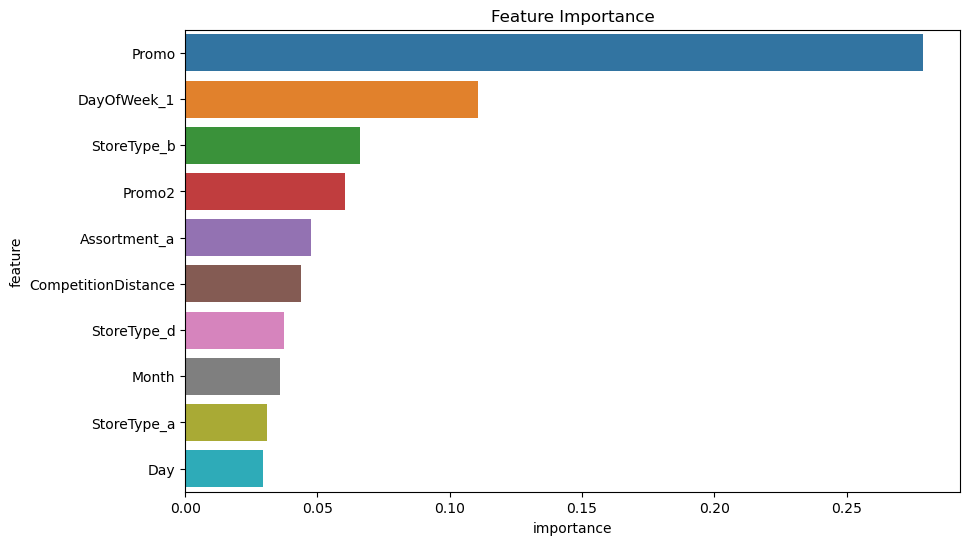

In [66]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature');

In [67]:
#PARAMETER TUNNING

In [119]:
#Parameter tuning
#prepare parameter
from sklearn.model_selection import ParameterGrid
param_grid={'n_estimators':range(100,1000,100)}
grid=ParameterGrid(param_grid)
#Tìm hiểu thêm về parameterGrid
#Range dãy số không có số cận trên

In [120]:
#Loop
rtwo=[]
for i in grid:
    model=XGBRegressor(n_estimators= i['n_estimators'], random_state=42,n_jobs=-1, max_depth=10)
    model.fit(X, targets)
    

    #Predict
    y_pred = model.predict(X)

    #Calculate r2
    r2 = r2_score(targets,y_pred)

    #Save f1_score
    rtwo.append(r2)

In [121]:
grid[np.argmax(rtwo)]['n_estimators']

900

In [122]:
rtwo

[0.9535637937719488,
 0.9684256604072234,
 0.9752107064247203,
 0.9792505528489572,
 0.9821324059231059,
 0.9845120942830714,
 0.9862908494514252,
 0.9877589142068998,
 0.9890260468646148]

In [126]:
model=XGBRegressor(n_estimators= 900, random_state=42,n_jobs=-1, max_depth=10)
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [127]:
test_preds = model.predict(X_test)

In [128]:
test_preds

array([ 5244.0005,  6221.0894,  8306.064 , ...,  6464.032 , 25781.748 ,
        8683.562 ], dtype=float32)

In [129]:
X_test

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,1,1270.0,82.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,2,1,1,570.0,92.0,1,64.131148,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,3,1,1,14130.0,103.0,1,51.901639,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,4,1,1,620.0,70.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
4,5,1,1,29910.0,3.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1,1,1900.0,13.0,1,24.0,1,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1111,1112,1,1,1880.0,111.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
1112,1113,1,1,9260.0,0.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1113,1114,1,1,870.0,0.0,0,0.0,0,31,7,2015,31,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [130]:
test

,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,879066,1,5,2015-07-31,555,1,1,0,1
1,37135,2,5,2015-07-31,625,1,1,0,1
2,285919,3,5,2015-07-31,821,1,1,0,1
3,744348,4,5,2015-07-31,1498,1,1,0,1
4,556250,5,5,2015-07-31,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1110,225022,1111,5,2015-07-31,422,1,1,0,1
1111,244217,1112,5,2015-07-31,767,1,1,0,1
1112,729063,1113,5,2015-07-31,720,1,1,0,1
1113,321477,1114,5,2015-07-31,3745,1,1,0,1


In [131]:
submission_df=pd.read_csv('submission.csv')
submission_df

,Id,Sales
0,879066,5250.649414
1,37135,5997.647461
2,285919,9207.910156
3,744348,12377.560547
4,556250,5296.302734
...,...,...
1110,225022,5522.552246
1111,244217,10388.424805
1112,729063,7826.353516
1113,321477,25639.830078


In [132]:
submission_df['Sales']  = test_preds

In [133]:
submission_df

,Id,Sales
0,879066,5244.000488
1,37135,6221.089355
2,285919,8306.064453
3,744348,13702.817383
4,556250,6357.863770
...,...,...
1110,225022,6189.859863
1111,244217,11341.056641
1112,729063,6464.032227
1113,321477,25781.748047
